In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, OutputLoader
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 100
p = 3

sim = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=p,
    flux_recipe=1,
    MOOD=True,
    cascade="muscl",
    max_MOOD_iters=1,
    limiting_vars="actives",
    NAD=True,
    NAD_atol=0.0,
    NAD_rtol=1e-5,
    PAD={"rho": (0, np.inf), "P": (0, np.inf)},
    lazy_primitives=False,
)

In [3]:
sim.run(0.245, path="/Users/jonathan/Desktop/superfv_out", overwrite=True)
sim.write_timings()

Step #66 @ t=2.45e-01 | dt=1.94e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   


In [4]:
loader = OutputLoader("/Users/jonathan/Desktop/superfv_out")

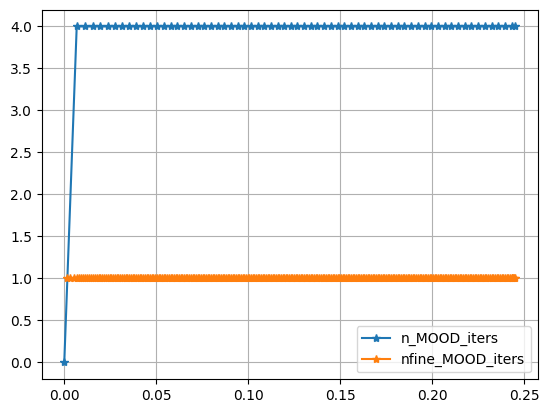

In [5]:
fig, ax = plt.subplots()
vis.plot_timeseries(loader, ax, "n_MOOD_iters", label="n_MOOD_iters", marker="*")
vis.plot_timeseries(
    loader, ax, "nfine_MOOD_iters", label="nfine_MOOD_iters", marker="*"
)
ax.grid()
ax.legend()

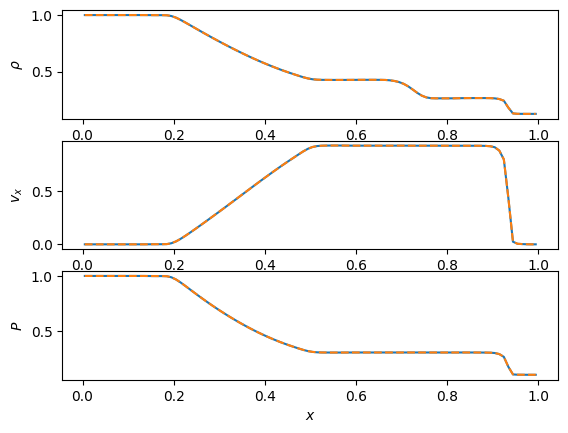

In [6]:
fig, axs = plt.subplots(3, 1)

axs[0].set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, axs[0], "rho")
vis.plot_1d_slice(loader, axs[0], "rho", linestyle="--")
axs[1].set_ylabel(r"$v_x$")
vis.plot_1d_slice(sim, axs[1], "vx")
vis.plot_1d_slice(loader, axs[1], "vx", linestyle="--")
axs[2].set_ylabel(r"$P$")
vis.plot_1d_slice(sim, axs[2], "P", xlabel=True)
vis.plot_1d_slice(loader, axs[2], "P", xlabel=True, linestyle="--")

In [7]:
sim = EulerSolver(
    ic=lambda idx, x, y, z, t, xp: ic.sinus(
        idx, x, y, z, bounds=(1, 2), P=1, vx=1, xp=xp
    ),
    nx=64,
    p=3,
)